In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\Subhiksha Venunath\\Documents\\Crude oil price prediction implementation'

In [3]:
data= pd.read_csv("Crude_Oil_Prices_Daily.csv")
data

,Date,Closing Value
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8218,03-07-2018,74.19
8219,04-07-2018,NaN
8220,05-07-2018,73.05
8221,06-07-2018,73.78


In [4]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [5]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [6]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [7]:
data_oil=data.reset_index()['Closing Value']

In [8]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
data_oil=Scaler.fit_transform(np.array(data_oil).reshape(-1,1))

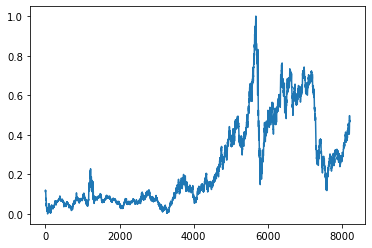

In [10]:
plt.plot(data_oil)

In [11]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [12]:
training_size,test_size

(5340, 2876)

In [13]:
train_data.shape

(5340, 1)

In [14]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        return np.array(dataX),np.array(dataY)

In [15]:
time_step=10
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)


In [16]:
print(X_train.shape),print(y_train.shape)

(1, 10)
(1,)


(None, None)

In [17]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, 0.11550422, 0.1156523 ,
        0.11683696, 0.1140234 , 0.10980305, 0.1089886 , 0.11054346]])

In [18]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [19]:
import tensorflow
import keras

In [20]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM


In [21]:
model=Sequential()

In [22]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 0.0100 - val_loss: 0.0933
Epoch 2/50
1/1 [==============================] - 0s 78ms/step - loss: 0.0060 - val_loss: 0.0725
Epoch 3/50
1/1 [==============================] - 0s 61ms/step - loss: 0.0029 - val_loss: 0.0532
Epoch 4/50
1/1 [==============================] - 0s 69ms/step - loss: 8.4877e-04 - val_loss: 0.0360
Epoch 5/50
1/1 [==============================] - 0s 59ms/step - loss: 6.5573e-06 - val_loss: 0.0226
Epoch 6/50
1/1 [==============================] - 0s 62ms/step - loss: 5.2605e-04 - val_loss: 0.0160
Epoch 7/50
1/1 [==============================] - 0s 62ms/step - loss: 0.0015 - val_loss: 0.0150
Epoch 8/50
1/1 [==============================] - 0s 71ms/step - loss: 0.0017 - val_loss: 0.0173
Epoch 9/50
1/1 [==============================] - 0s 81ms/step - loss: 0.0013 - val_loss: 0.0216
Epoch 10/50
1/1 [==============================] - 0s 163ms/step - loss: 6.6246e-04 - val_loss: 0.0270
Epoch 11/50


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [28]:
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.348571122637082

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

29.86906194891662

In [32]:
from tensorflow.keras.models import load_model

In [33]:
model.save("crude_oil.h5")

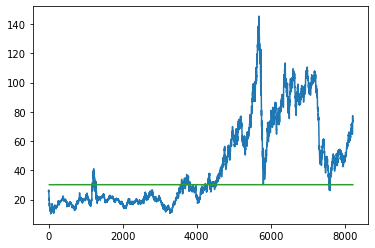

Green indicates predicted data
Blue indicates complete data
Orange indicates train data


In [34]:
look_back=10
trainPredictPlot=np.empty_like(data_oil)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(data_oil)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1,:]=test_predict
plt.plot(Scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot,label="traindata")
plt.plot(testPredictPlot,label="testdata")
plt.show()
print("Green indicates predicted data")
print("Blue indicates complete data")
print("Orange indicates train data")

In [35]:
len(test_data)

2876

In [36]:
X_input=test_data[2866:].reshape(1,-1)
X_input.shape

(1, 10)

In [37]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()


In [38]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [39]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape((1,n_steps,1))
        yhat=model.predict(X_input,verbose=0)
        print("{} day output {}.format(i,yhat)")
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input=X_input.reshape((1,n_steps,1))
        yhat=model.predict(X_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.1642093]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.16420931]
{} day output {}.format(i,yhat)
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.16420931 0.16367218]
{} day output {}.format(i,yhat)
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.16420931 0.16367218 0.16097896]
{} day output {}.format(i,yhat)
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.16420931 0.16367218 0.16097896 0.15659374]
{} day output {}.format(i,yhat)
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.16420931
 0.16367218 0.16097896 0.15659374 0.15153584]
{} day output {}.format(i,yhat)
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.16420931 0.16367218
 0.16097896 0.15659374 0.15153584 0.14546236]
{} day output {}.format(i,yhat)
7 day input [0.46497853 0.47038353 0.471494

In [40]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [41]:
len(data_oil)

8216

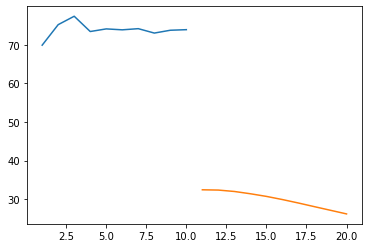

In [42]:
plt.plot(day_new,Scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,Scaler.inverse_transform(lst_output))


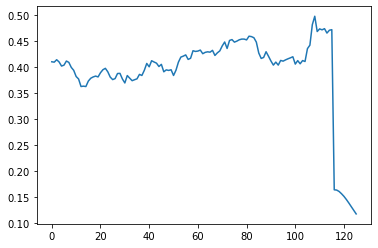

In [43]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

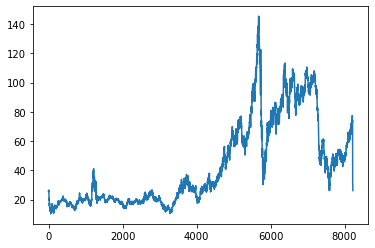

In [44]:
df3=Scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [46]:
model=load_model("crude_oil.h5")

In [45]:
from keras.models import load_model